In [194]:
#from pytorch_lightning import LightningModule, Trainer
#import torch
#from torch.utils.data import DataLoader, TensorDataset, SubsetRandomSampler, Subset
#import torch.nn as nn
#import torch.nn.functional as F
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Import datasets

In [142]:
train_dataset = pd.read_csv("/Users/georg/Desktop/Projects/titanic/train.csv")
test_dataset = pd.read_csv("/Users/georg/Desktop/Projects/titanic/test.csv")

In [6]:
train_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
test_dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Baselines

##### Based on majority class

In [58]:
print("Survived: ", len(train_dataset.loc[train_dataset["Survived"] == 1]))
print("Died: ", len(train_dataset.loc[train_dataset["Survived"] == 0]))
print("Assign majority class: Everybody died (assign label 0 to every person in test set)")
print("Yielded accuracy: 0.622")

Survived:  342
Died:  549
Assign majority class: Everybody died (assign label 0 to every person in test set)
Yielded accuracy: 0.622


In [56]:
# # Write majority class prediction
# test_dataset["Survived"] = 0
# test_dataset_baseline_majority = test_dataset[['PassengerId', 'Survived']]
# test_dataset_baseline_majority.to_csv("./predictions/test_csv_baseline_majority.csv", index=False)

##### Based on feature classes

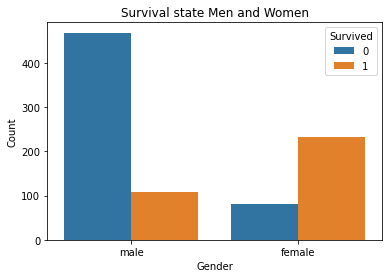

In [64]:
plt.figure(figsize=(6, 4))
sn.countplot(x=train_dataset["Sex"], hue=train_dataset["Survived"])
plt.title("Survival state Men and Women")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

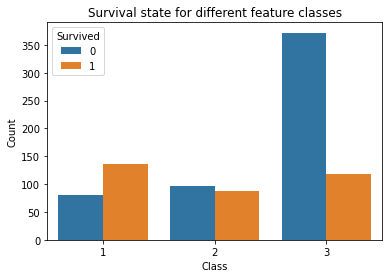

In [85]:
plt.figure(figsize=(6, 4))
sn.countplot(x=train_dataset["Pclass"], hue=train_dataset["Survived"])
plt.title("Survival state for different feature classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

We can construct different feature classes for the passengers given their Sex and Class parameter value. We predict their survival according to the class they belong to:

- Male & 3rd class: 0
- Male & 2nd class: 0
- Male & 1st class: 0
- Female & 3rd class: 0
- Female & 2nd class: 1
- Female & 1st class: 1

In [86]:
print("Assign feature classes: Females in 2nd and 1st class survived, rest died")
print("Yielded accuracy: 0.77511")

Assign feature classes: Females in 2nd and 1st class survived, rest died
Yielded accuracy: 0.77511


In [83]:
# Write feature class prediction
# td_cl = test_dataset
# td_cl["Survived"] = 0
# td_cl.loc[(td_cl['Sex'] == "female") & (td_cl['Pclass'] == 2), 'Survived'] = 1
# td_cl.loc[(td_cl['Sex'] == "female") & (td_cl['Pclass'] == 1), 'Survived'] = 1
# td_cl = td_cl[['PassengerId', 'Survived']]
# td_cl.to_csv("./predictions/test_csv_feature_classes.csv", index=False)

##### Excursion: Principal Component Analysis

In [209]:
train_pca = train_dataset.copy()
train_pca.loc[train_pca["Sex"] == "female", "Sex"] = 1
train_pca.loc[train_pca["Sex"] == "male", "Sex"] = 0
train_pca = train_pca[["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
train_pca = train_pca.dropna()
train_pca

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,3,1,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,886,3,1,39.0,0,5,29.1250
886,887,2,0,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
889,890,1,0,26.0,0,0,30.0000


In [210]:
train_pca = StandardScaler().fit_transform(train_pca)
train_pca

array([[-1.72853202,  0.91123237, -0.75905134, ...,  0.52457013,
        -0.50589515, -0.51897787],
       [-1.7246701 , -1.47636364,  1.31743394, ...,  0.52457013,
        -0.50589515,  0.69189675],
       [-1.72080817,  0.91123237,  1.31743394, ..., -0.55170307,
        -0.50589515, -0.50621356],
       ...,
       [ 1.69699835, -1.47636364,  1.31743394, ..., -0.55170307,
        -0.50589515, -0.08877362],
       [ 1.70472221, -1.47636364, -0.75905134, ..., -0.55170307,
        -0.50589515, -0.08877362],
       [ 1.70858414,  0.91123237, -0.75905134, ..., -0.55170307,
        -0.50589515, -0.50952283]])

In [211]:
pca = PCA(n_components=2)
pca_titanic = pca.fit_transform(train_pca)

In [212]:
pca_titanic

array([[-1.0215856 ,  1.04271932],
       [ 1.60727384, -0.82498115],
       [-0.52511984,  0.60274588],
       ...,
       [ 0.70540669, -0.78073744],
       [-0.13625141, -1.27651501],
       [-1.45788762, -0.24507323]])

In [213]:
pca_df = pd.DataFrame(data = pca_titanic, columns = ['component1', 'component2'])
pca_df

,component1,component2
0,-1.021586,1.042719
1,1.607274,-0.824981
2,-0.525120,0.602746
3,1.405781,-0.628689
4,-1.365088,0.027072
...,...,...
709,2.124131,1.793836
710,-0.861914,-0.654638
711,0.705407,-0.780737
712,-0.136251,-1.276515


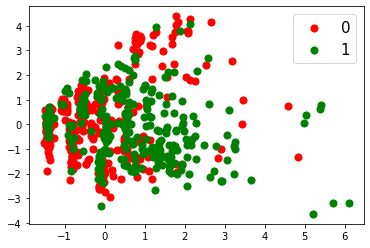

In [214]:
targets = [0, 1]
colors = ['r', 'g']
trdf = train_dataset[train_dataset['Age'].notna()]
trdf = trdf.reset_index()
for target, color in zip(targets,colors):
    indicesToKeep = trdf['Survived'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'component1'], pca_df.loc[indicesToKeep, 'component2'], c = color, s = 50)
plt.legend(targets,prop={'size': 15})

In [50]:
#
#
#
#
#
#
#
#
#
#
#
#

In [35]:
classes = [1,2,3]
survival_rate = []

for cls in classes:
    survivors = len(train_dataset.loc[(train_dataset["Pclass"] == cls) & (train_dataset["Survived"] == 1)])
    dead = len(train_dataset.loc[(train_dataset["Pclass"] == cls) & (train_dataset["Survived"] == 0)])
    percentage = survivors / (survivors + dead)
    survival_rate.append(percentage)
data = pd.DataFrame({"class": classes, "survival_rate": survival_rate})

In [36]:
data

,class,survival_rate
0,1,0.629630
1,2,0.472826
2,3,0.242363


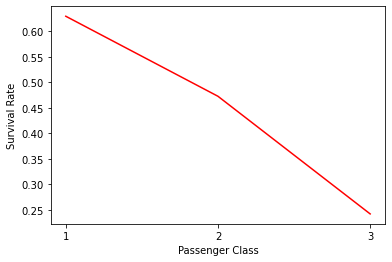

In [42]:
plt.xticks([1,2,3])
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.plot(data["class"], data["survival_rate"], "r")